# **Import Library**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras import optimizers


In [2]:
df = pd.read_csv('data/personality-with-label.csv')
df

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,2
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0,0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0,3
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,3
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711958,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0,4
711959,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,1
711960,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0,0
711961,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0,1


In [3]:
# Statistical measures about the data
df.describe()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
count,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,...,711963.000000,711963.000000,711963.000000,711963.00000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000
mean,2.675364,3.357805,3.352702,2.823718,2.993576,3.306509,3.886288,2.842194,3.030153,2.768274,...,2.719799,3.800422,3.333387,3.72597,3.744856,3.857605,3.252411,4.340848,4.019911,1.925468
std,1.222582,1.139285,1.192673,1.351908,1.291578,1.288392,1.090061,1.263299,1.236890,1.268118,...,1.220807,1.011567,1.182091,0.89193,1.056115,0.881973,1.184793,0.704847,0.935402,1.501977
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.00000,3.000000,3.000000,2.000000,4.000000,3.000000,1.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [4]:
# Checking the distribution of labels
df['labels'].value_counts()

labels
0    173907
4    161076
1    148782
3    121380
2    106818
Name: count, dtype: int64

In [5]:
df.groupby('labels').mean()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
labels,,,,,,,,,,,,,,,,,,,,,
0,2.856797,3.629917,3.512820,3.003048,3.254653,2.445238,3.180436,2.102877,2.403060,2.104228,...,3.536361,2.727596,3.661704,3.216553,3.671043,3.806862,3.949927,3.280017,4.158637,4.041804
1,1.957757,2.514861,2.592572,1.941048,2.262700,4.317041,4.632301,3.815488,3.851830,3.780330,...,3.308068,2.429185,3.816913,3.208762,3.569598,3.567394,3.491726,3.142517,4.475474,3.758331
2,3.710114,4.535631,4.492174,4.156125,3.939767,2.383428,3.239351,1.968825,2.218428,1.720543,...,3.911841,3.279438,3.983945,3.754227,4.106939,4.036333,4.380928,3.394475,4.382997,4.513434
3,1.847215,2.471964,2.345980,1.822310,2.296441,3.250181,3.767968,2.731727,2.967103,3.006088,...,3.203370,2.345419,3.552595,2.871264,3.389059,3.568174,3.481043,3.165802,4.161987,3.609623
4,3.080173,3.729078,3.884924,3.316434,3.284654,3.957573,4.477470,3.403816,3.534046,3.066006,...,3.650916,2.890803,4.000006,3.643795,3.930952,3.781674,4.032600,3.295165,4.520053,4.219784


# Separating feature and target

In [6]:
X = df.drop(columns='labels', axis=1)
y = df['labels']

# convert cluster into encoding
# Y = pd.get_dummies(y).values

In [7]:
X

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,3.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,4.0,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,2.0,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,5.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711958,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,2.0,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0
711959,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0
711960,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,4.0,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0
711961,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0


In [8]:
y

0         2
1         0
2         3
3         3
4         2
         ..
711958    4
711959    1
711960    0
711961    1
711962    4
Name: labels, Length: 711963, dtype: int64

# Splitting data into training and testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X.shape, X_train.shape, X_test.shape)

(711963, 25) (569570, 25) (142393, 25)


# Training

In [10]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(25,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # Jumlah output sesuai dengan jumlah klaster kepribadian
])

learning_rate = 1.0e-5 # Learning rate yang lebih kecil
optimizer = optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 11,909
Trainable params: 11,909
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Evaluasi model pada set pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Akurasi:", accuracy)

4450/4450 [==============================] - 12s 3ms/step - loss: 2.8263 - accuracy: 0.1513
Loss: 2.8263163566589355
Akurasi: 0.15129956603050232


In [14]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    # Check accuracy
    if(logs.get('accuracy') > 0.9): # Change get parameter to loss if u want check based on loss
      # Stop if threshold is met
      print("\accuracy is grater than 0.9 so cancelling training!")
      self.model.stop_training = True

In [16]:
# Instantiate class
callbacks = myCallback()
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/100
4450/4450 [==============================] - 18s 4ms/step - loss: 1.0426 - accuracy: 0.5896 - val_loss: 0.8520 - val_accuracy: 0.6477
Epoch 2/100
4450/4450 [==============================] - 18s 4ms/step - loss: 0.8005 - accuracy: 0.6585 - val_loss: 0.7639 - val_accuracy: 0.6700
Epoch 3/100
4450/4450 [==============================] - 18s 4ms/step - loss: 0.7457 - accuracy: 0.6740 - val_loss: 0.7281 - val_accuracy: 0.6806
Epoch 4/100
4450/4450 [==============================] - 18s 4ms/step - loss: 0.7174 - accuracy: 0.6833 - val_loss: 0.7046 - val_accuracy: 0.6899
Epoch 5/100
4450/4450 [==============================] - 21s 5ms/step - loss: 0.6964 - accuracy: 0.6921 - val_loss: 0.6852 - val_accuracy: 0.6986
Epoch 6/100
4450/4450 [==============================] - 20s 4ms/step - loss: 0.6777 - accuracy: 0.6999 - val_loss: 0.6667 - val_accuracy: 0.7066
Epoch 7/100
4450/4450 [==============================] - 20s 4ms/step - loss: 0.6604 - accuracy: 0.7077 - val_loss: 0.6500 -

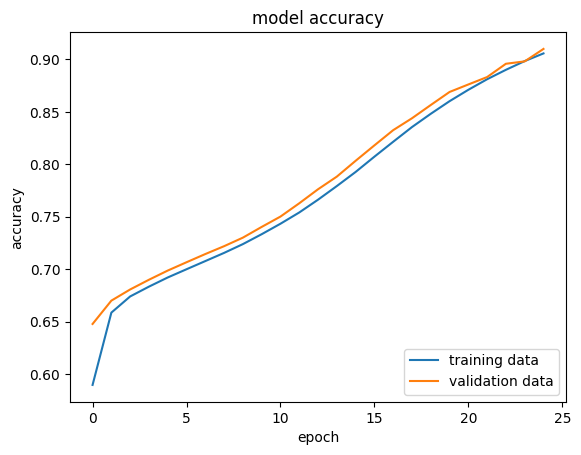

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

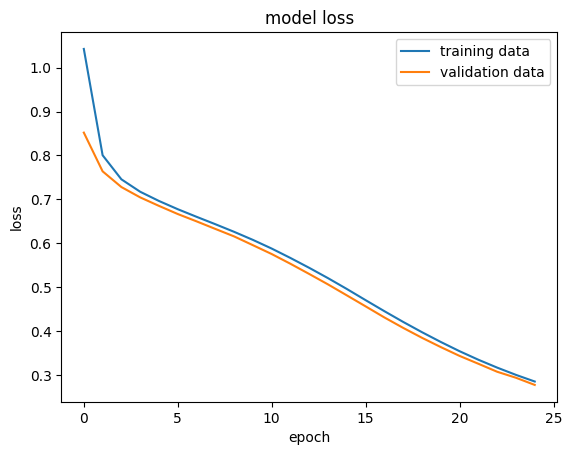

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [26]:
# my_data = [2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2]
# my_data = np.array(my_data).reshape(1, -1)

In [40]:
predictions = model.predict(X_test)
predicted_clusters = np.argmax(predictions, axis=1)
print(predicted_clusters)

4450/4450 [==============================] - 9s 2ms/step
[1 0 2 ... 2 1 0]


In [41]:
y_test.head(20)

124267    1
150876    0
441708    2
206761    1
519110    4
601074    2
653331    3
517997    1
662629    0
545851    4
168720    4
460293    0
264137    3
493603    3
206066    3
691751    4
197709    0
635771    0
10132     0
381110    4
Name: labels, dtype: int64

In [42]:
predicted_clusters[:20]

array([1, 0, 2, 1, 4, 2, 3, 1, 0, 4, 4, 3, 3, 3, 3, 4, 0, 0, 0, 4],
      dtype=int64)

In [45]:
# Calculate precision
precision = precision_score(y_test, predicted_clusters, average='micro')

# Calculate recall
recall = recall_score(y_test, predicted_clusters, average='micro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9100025984423391
Recall: 0.9100025984423391
